<a href="https://colab.research.google.com/github/mhanush/PRODIGY_ML_01/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
!unzip -q "/content/drive/MyDrive/house price.zip"

In [9]:
df = pd.read_csv("/content/train.csv")
print(df.corr())
print(df.describe())

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

<ipython-input-9-6d9e599c4353>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


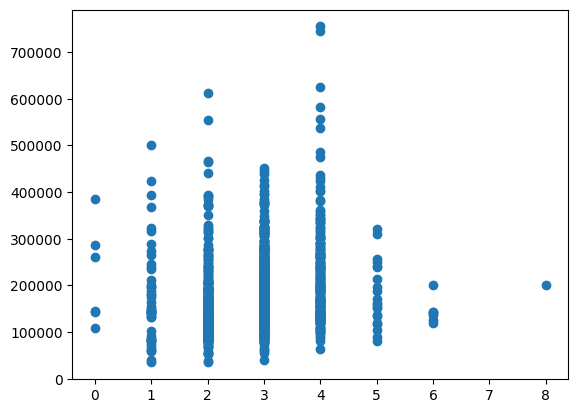

In [12]:
plt.scatter(df["BedroomAbvGr"],df["SalePrice"])

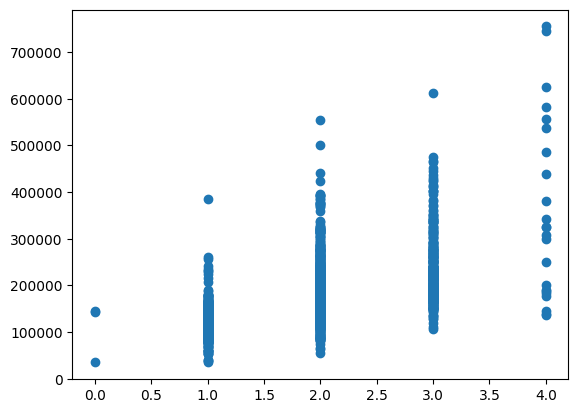

In [14]:
df["Bathroom"]=df["FullBath"]+df["HalfBath"]
plt.scatter(df["Bathroom"],df["SalePrice"])

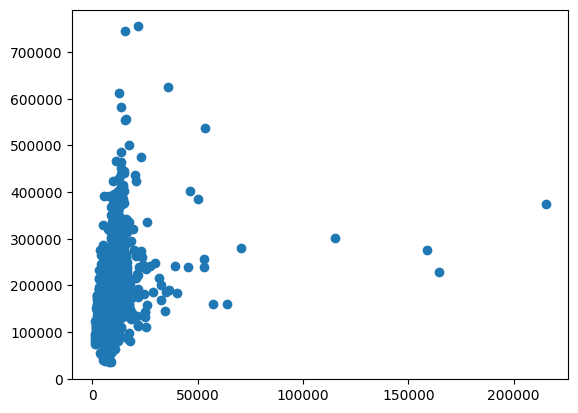

In [15]:
plt.scatter(df["LotArea"],df["SalePrice"])

In [16]:
def getfeature(dataobj):
  return [dataobj.min(),dataobj.max()]
bath_range = getfeature(df["Bathroom"])
bed_range = getfeature(df["BedroomAbvGr"])
area_range = getfeature(df["LotArea"])

In [17]:
def normalize(dataobj,lower,upper):
  data_normalized = (dataobj - dataobj.min()) / (dataobj.max() - dataobj.min()) * (upper - lower) + lower
  return data_normalized
def normalize_input(x,l1,u1,l2,u2):
  val = (x-l1)/(u1-l1)*(u2-l2)+l2
  return val
df["Price"] = normalize(df["SalePrice"],1,10)
df["Area"] = normalize(df["LotArea"],1,10)

In [18]:
x = df[["BedroomAbvGr","Bathroom","Area"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(1168, 3) (292, 3)


In [19]:
class ML_model:
  def __init__(self,learn,epoch):
    self.learn_rate = learn
    self.epochs = epoch
    self.tolerance = 1e-6
    self.intercept = 0
    self.weights = None

  def fit(self,x,y):
    x = np.column_stack((np.ones(len(x)),x))
    self.weights = np.random.randn(x.shape[1])

    perror = np.inf
    for _ in range(self.epochs):
      pred = np.dot(x,self.weights)
      error = y - pred

      self.weights += self.learn_rate * np.dot(x.T, error)/ len(x)
      self.intercept += self.learn_rate * np.mean(error)

      cerror = np.mean(error**2)
      if abs(cerror - perror) > self.tolerance:
        perror = cerror

  def predict(self,x):
      x = np.column_stack((np.ones(len(x)),x))
      return np.dot(x,self.weights)

In [20]:
model = ML_model(0.1,5000)
X_train = np.array(X_train)
y_train = np.array(y_train)
model.fit(X_train, y_train)

In [21]:
y_pred = model.predict(X_test[:5])
print("Actual values:",y_test[:5],"\n")
print("Predictions:", y_pred)
print("Final weights:", model.weights)
print("Intercept:", model.intercept)
print("Mean Squared Error:",mean_squared_error(y_pred,y_test[:5]))

Actual values: 892     2.494792
1105    4.625746
413     2.001111
522     2.551035
1036    4.507013
Name: Price, dtype: float64 

Predictions: [2.10177362 3.58235198 2.2153881  2.73609071 2.99574208]
Final weights: [ 1.09445003 -0.10276898  0.70213128  0.47218989]
Intercept: 2.2323609586546
Mean Squared Error: 0.7214471483671696


In [22]:
val = {"Bedrooms":10,"Bathrooms":5,"Area":12.417}
new_value = pd.DataFrame([val])
print(model.predict(new_value))


[9.44059853]
